In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from cleaning import prepare_tbi_data

# Before cleaning

In [42]:

df_original = pd.read_csv('../data/TBI PUD 10-08-2013.csv')
df_original.describe()

,PatNum,EmplType,Certification,InjuryMech,High_impact_InjSev,Amnesia_verb,LOCSeparate,LocLen,Seiz,SeizOccur,...,Finding20,Finding21,Finding22,Finding23,DeathTBI,HospHead,HospHeadPosCT,Intub24Head,Neurosurgery,PosIntFinal
count,43399.000000,43381.000000,43399.000000,43098.000000,43065.000000,41103.000000,41507.000000,40843.000000,42487.000000,43328.000000,...,43399.000000,43399.000000,43399.000000,43399.000000,43391.000000,43396.000000,43399.000000,43395.000000,43398.000000,43379.000000
mean,21700.000000,3.996750,3.984055,13.905146,1.986555,32.888159,0.213313,82.578532,0.014193,90.890694,...,58.296643,58.296551,58.296850,58.296297,0.001521,0.020002,0.015968,0.004401,0.004609,0.017589
std,12528.356503,1.161454,11.178135,22.697257,0.565865,43.603687,0.514553,27.517329,0.118286,9.949818,...,44.326113,44.326233,44.325843,44.326564,0.038971,0.140008,0.125353,0.066198,0.067730,0.131454
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10850.500000,3.000000,2.000000,6.000000,2.000000,0.000000,0.000000,92.000000,0.000000,92.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21700.000000,5.000000,3.000000,8.000000,2.000000,0.000000,0.000000,92.000000,0.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32549.500000,5.000000,3.000000,10.000000,2.000000,91.000000,0.000000,92.000000,0.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,43399.000000,5.000000,90.000000,90.000000,3.000000,91.000000,2.000000,92.000000,1.000000,92.000000,...,92.000000,92.000000,92.000000,92.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
df_original.info()
df_original.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43399 entries, 0 to 43398
Columns: 125 entries, PatNum to PosIntFinal
dtypes: float64(48), int64(77)
memory usage: 41.4 MB


(43399, 125)

/tmp/ipykernel_3783390/1332034511.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_na.index, y=top_20_na.values, palette="viridis")  # Choose a suitable color palette


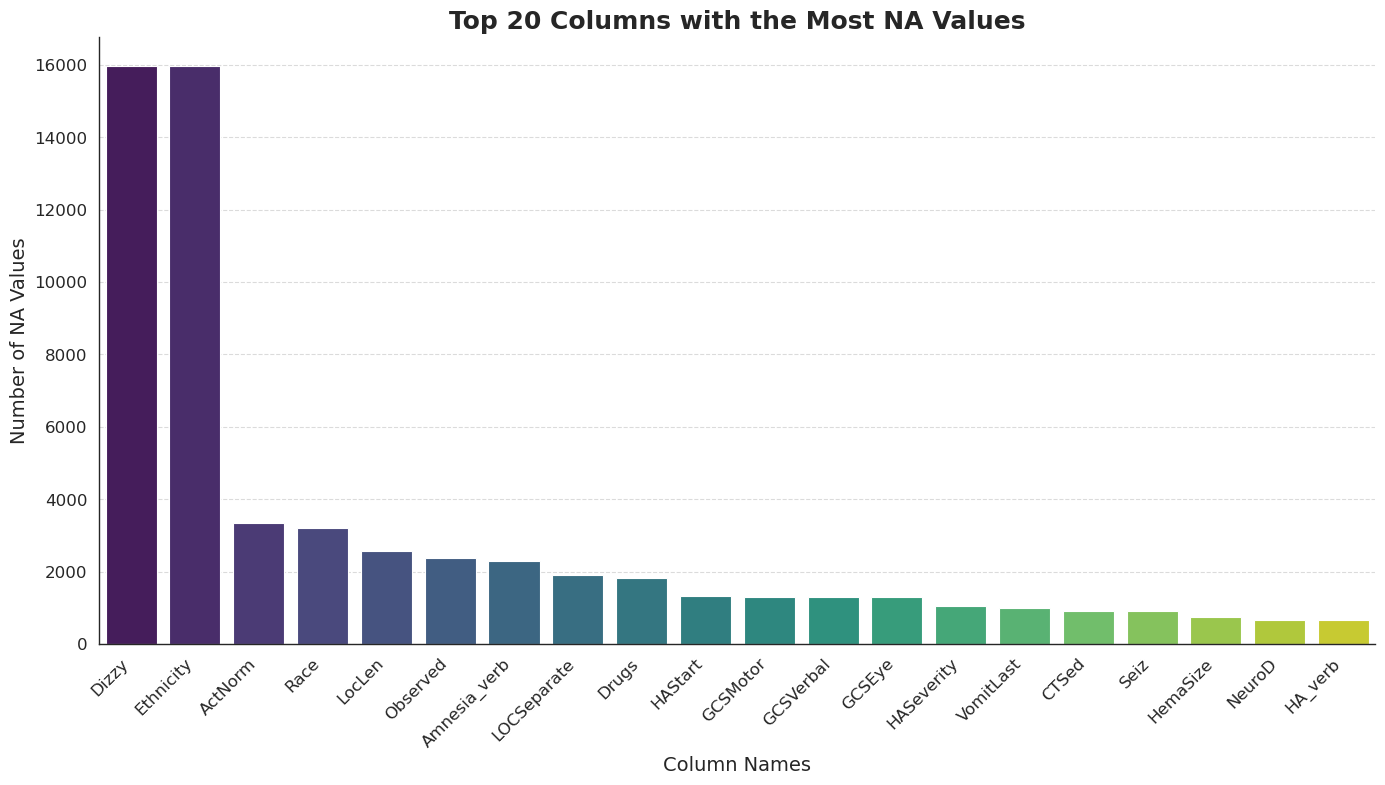

In [70]:
na_counts = df_original.isnull().sum()

na_counts = na_counts[na_counts > 0]

# Sort in descending order by the number of NA values
na_counts = na_counts.sort_values(ascending=False)

# Select the top 20
top_20_na = na_counts.head(20)

# --- Enhanced Visualization ---
plt.figure(figsize=(14, 8))  # Larger figure size

# Use Seaborn for enhanced aesthetics
sns.barplot(x=top_20_na.index, y=top_20_na.values, palette="viridis")  # Choose a suitable color palette

# Add title and labels
plt.title('Top 20 Columns with the Most NA Values', fontsize=18, fontweight='bold')  # More prominent title
plt.xlabel('Column Names', fontsize=14)
plt.ylabel('Number of NA Values', fontsize=14)

# Rotate x-axis labels and adjust alignment
plt.xticks(rotation=45, ha='right', fontsize=12)  # Slant labels, right-align
plt.yticks(fontsize=12)

# Add grid lines (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better readability


sns.despine()

plt.tight_layout()

output_dir = '../figs'


if not os.path.exists(output_dir):
    os.makedirs(output_dir) 

output_path = os.path.join(output_dir, 'top_20_na_values.png') 

plt.savefig(output_path, dpi=300)  
plt.show()

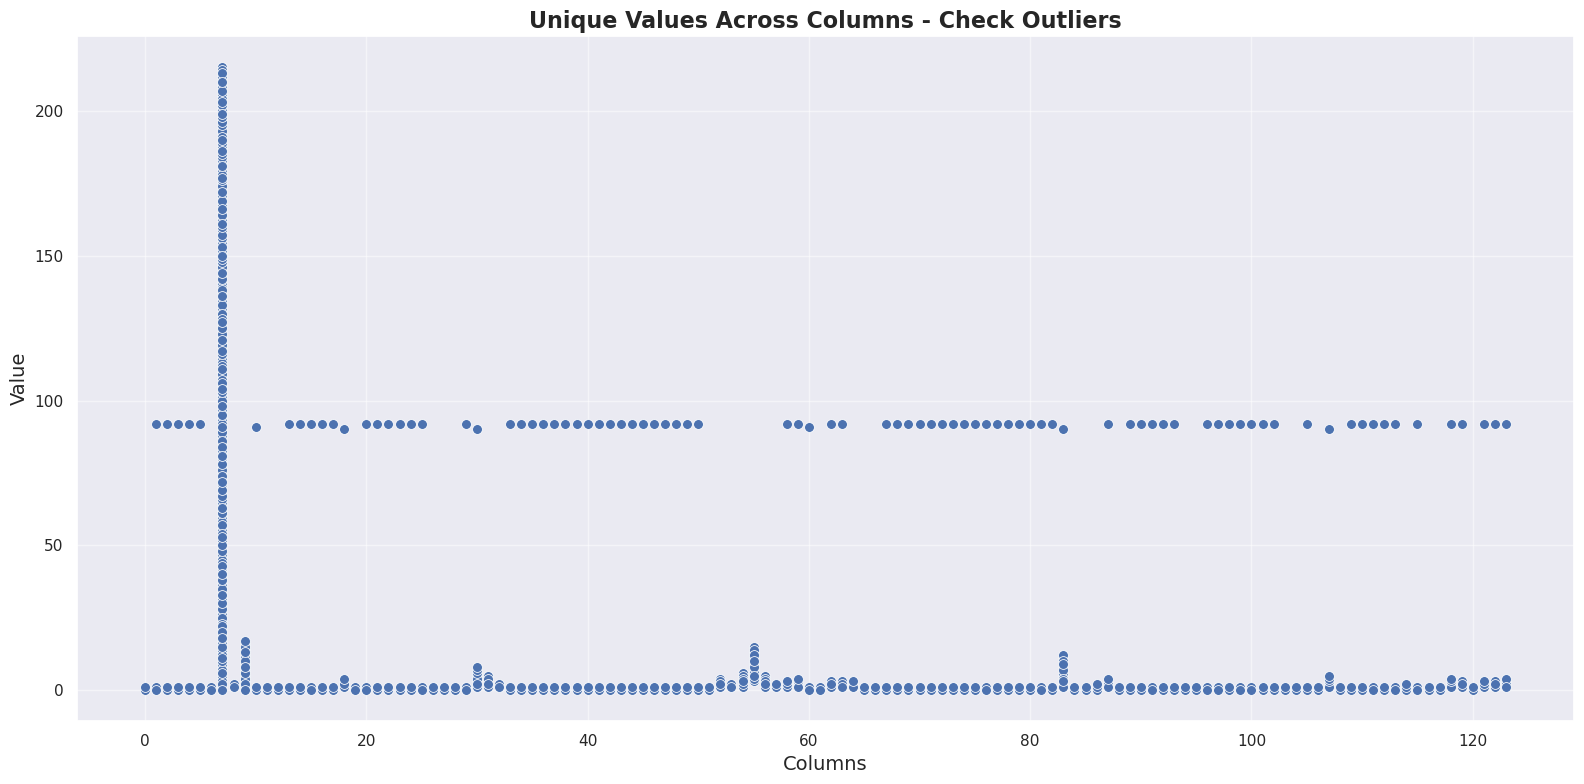

In [45]:

data = df_original.iloc[:,1:]

unique_values_data = {}
for col in data.columns:
    unique_vals = data[col].unique()

    unique_values_data[col] = unique_vals

data_list = []
for col, unique_vals in unique_values_data.items():
    for val in unique_vals:
        data_list.append({'column': col, 'value': val})

df = pd.DataFrame(data_list)

df['column_code'] = df['column'].astype('category').cat.codes

plt.figure(figsize=(16, 8))
sns.scatterplot(x='column_code', y='value', data=df, s=50)

plt.xlabel('Columns', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Unique Values Across Columns - Check Outliers', fontsize=16, fontweight='bold')

plt.tight_layout()

output_path = os.path.join(output_dir, 'values_across_col.png') 

plt.savefig(output_path, dpi=300) 
plt.show()

# after cleaning

In [46]:
df_original = pd.read_csv('../data/TBI PUD 10-08-2013.csv')
prepared_data = prepare_tbi_data(df_original)


In [47]:
prepared_data['ActNorm_inverse'] = 1-prepared_data['ActNorm']
prepared_data['GCSGroup_01'] = 2 - prepared_data['GCSGroup']


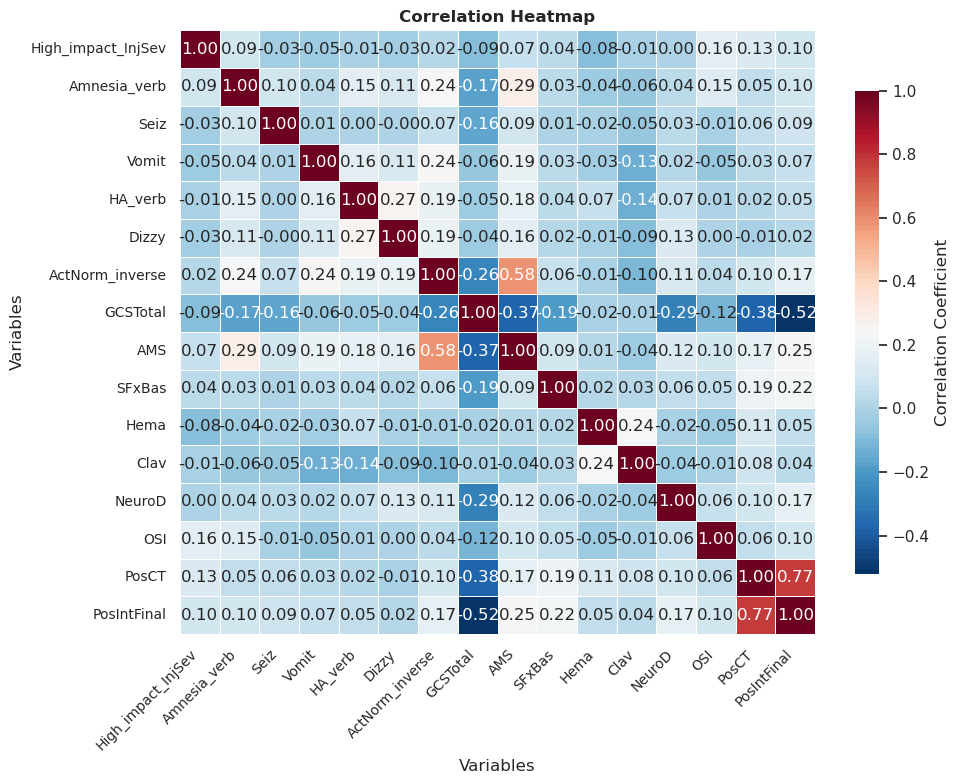

In [48]:

selected_variables = ['High_impact_InjSev','Amnesia_verb','Seiz', 'Vomit', 'HA_verb','Dizzy', 'ActNorm_inverse','GCSTotal', 'AMS', 'SFxBas', 'Hema', 'Clav', 'NeuroD', 'OSI', 'PosCT', 'PosIntFinal']



selected_data = prepared_data[selected_variables]


correlation_matrix = selected_data.corr()
plt.figure(figsize=(10, 8))


cmap = sns.color_palette("RdBu_r", 100)


heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5, linecolor="white", cmap=cmap,
                    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'})


plt.title("Correlation Heatmap", fontweight='bold') 

plt.xticks(rotation=45, ha="right", fontsize=10) 
plt.yticks(rotation=0, fontsize=10)

plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)


plt.tight_layout()

plt.savefig("../figs/eda3.png", dpi=300, bbox_inches='tight')

plt.show()

In [49]:
citbi_data = prepared_data[prepared_data['PosIntFinal'] == 1]
cttbi_data = prepared_data[prepared_data['PosCT'] == 1]
notbi_data = prepared_data[(prepared_data['PosCT'] != 1) & (prepared_data['PosIntFinal'] != 1) ]

columns_to_plot = ['Seiz', 'Vomit', 'HA_verb','Dizzy', 'ActNorm_inverse']


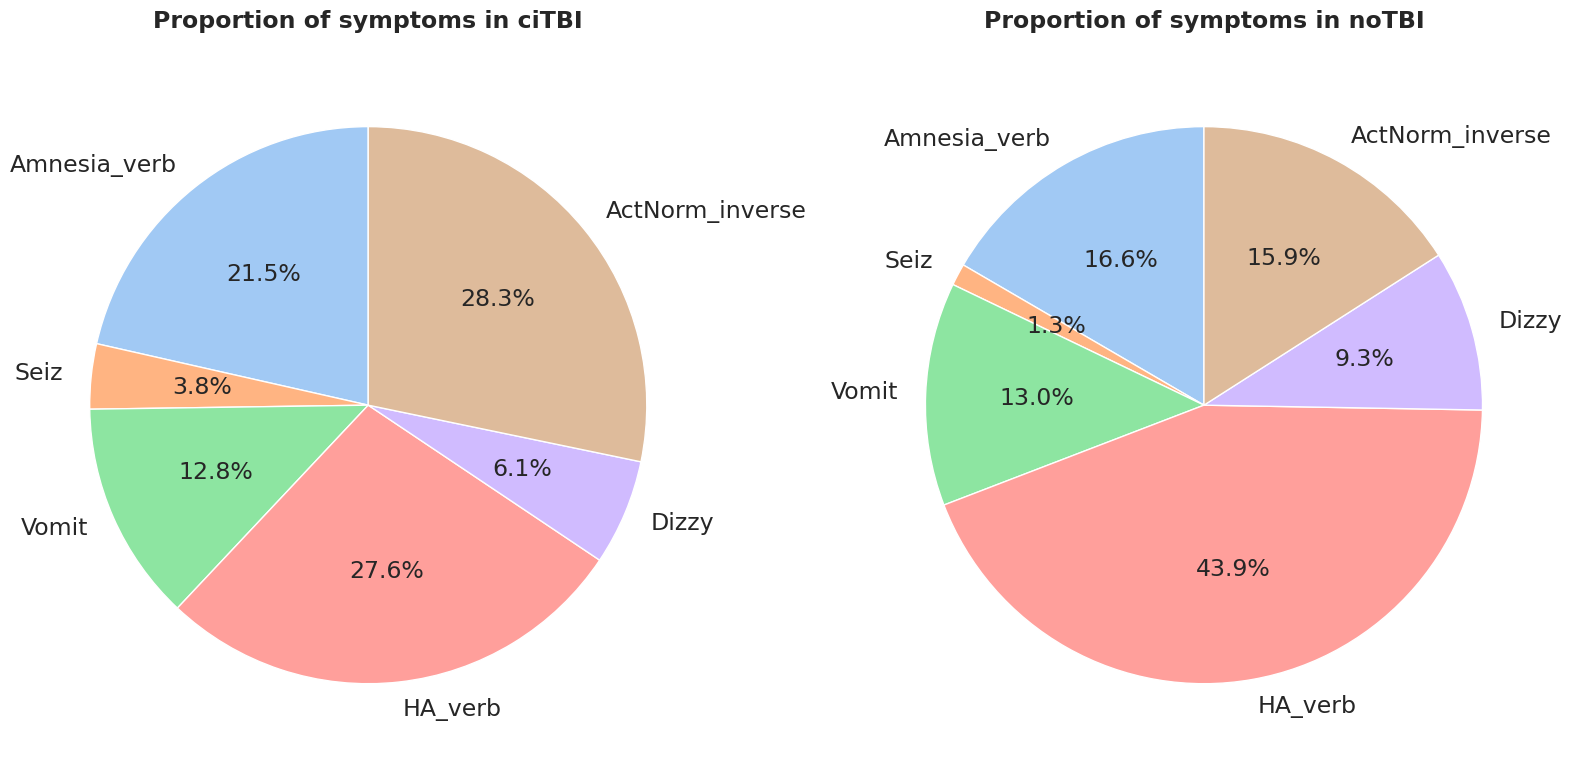

In [50]:
columns = ['Amnesia_verb','Seiz', 'Vomit', 'HA_verb','Dizzy', 'ActNorm_inverse']

frequencies1 = {}
frequencies2 = {}
for col in columns:
    frequencies1[col] = citbi_data[col].value_counts(normalize=True).get(1, 0) 
    frequencies2[col] = notbi_data[col].value_counts(normalize=True).get(1, 0)

frequencies1_df = pd.DataFrame.from_dict(frequencies1, orient='index', columns=['Frequency'])
frequencies2_df = pd.DataFrame.from_dict(frequencies2, orient='index', columns=['Frequency'])
#frequencies_df = frequencies_df.sort_values(by='Frequency', ascending=False)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  # 1 行 2 列
label_fontsize = 17 
autopct_fontsize = 15  

ax1.pie(frequencies1_df['Frequency'],
        labels=frequencies1_df.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'),
        textprops={'fontsize': label_fontsize})  
ax1.set_title("Proportion of symptoms in ciTBI", fontsize=17,fontweight='bold')
ax1.axis('equal')


ax2.pie(frequencies2_df['Frequency'],
        labels=frequencies2_df.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'),
        textprops={'fontsize': label_fontsize}) 
ax2.set_title("Proportion of symptoms in noTBI", fontsize=17,fontweight='bold')
ax2.axis('equal')

plt.tight_layout()
plt.savefig("../figs/eda2.png", dpi=300, bbox_inches='tight')
plt.show()

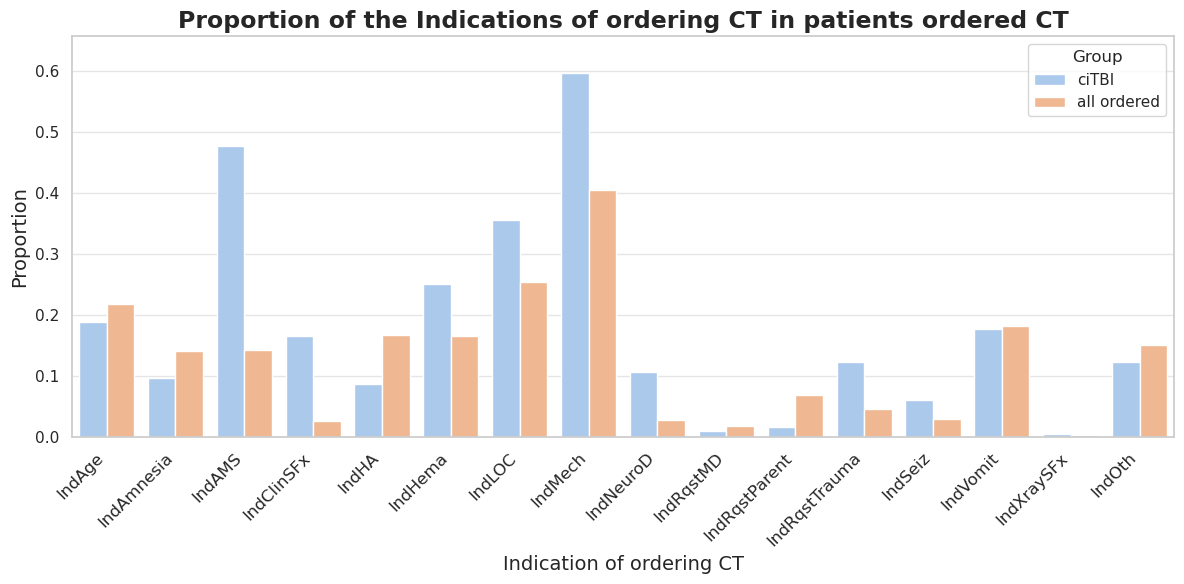

In [51]:




orderedCT_tbi_data = prepared_data[(prepared_data['CTForm1'] == 1) & (prepared_data['PosIntFinal'] == 1)]
orderedCT_data = prepared_data[prepared_data['CTForm1'] == 1]
columns = ['IndAge', 'IndAmnesia', 'IndAMS', 'IndClinSFx', 'IndHA', 'IndHema', 'IndLOC','IndMech', 'IndNeuroD', 'IndRqstMD','IndRqstParent','IndRqstTrauma','IndSeiz','IndVomit','IndXraySFx','IndOth']

frequencies1 = {}
frequencies2 = {}
for col in columns:
    frequencies1[col] = orderedCT_tbi_data[col].value_counts(normalize=True).get(1, 0)
    frequencies2[col] = orderedCT_data[col].value_counts(normalize=True).get(1, 0)

frequencies1_df = pd.DataFrame.from_dict(frequencies1, orient='index', columns=['Frequency'])
frequencies2_df = pd.DataFrame.from_dict(frequencies2, orient='index', columns=['Frequency'])

frequencies1_df['Group'] = 'ciTBI'
frequencies2_df['Group'] = 'all ordered'
frequencies_df = pd.concat([frequencies1_df, frequencies2_df])
frequencies_df = frequencies_df.reset_index().rename(columns={'index': 'Exam Result'})


plt.figure(figsize=(12, 6))
sns.set(style="whitegrid") 

ax = sns.barplot(x='Exam Result', y='Frequency', hue='Group', data=frequencies_df, palette='pastel')

plt.xlabel('Indication of ordering CT', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title("Proportion of the Indications of ordering CT in patients ordered CT", fontsize=17,fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12) 
plt.ylim(0, frequencies_df['Frequency'].max() * 1.1) 
plt.tight_layout() 
plt.legend(title='Group')

plt.savefig("../figs/eda4.png", dpi=300, bbox_inches='tight')
plt.show()

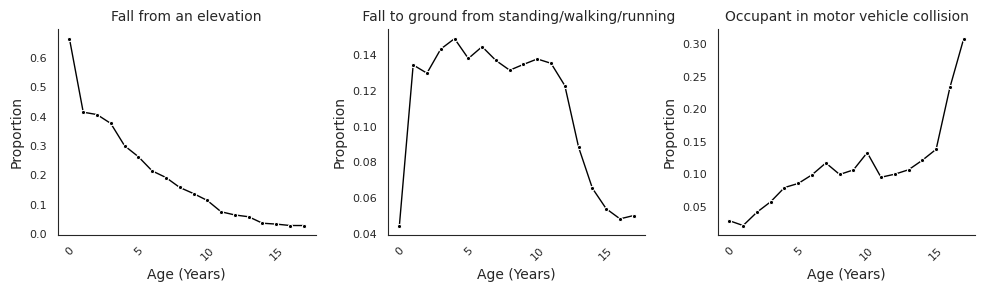

In [52]:

tbi_data = prepared_data[prepared_data['PosIntFinal'] == 1]


col_name = 'InjuryMech'
sub_titiles = ['Fall from an elevation',' Fall to ground from standing/walking/running','Occupant in motor vehicle collision']
nums = [8,6,1]

sns.set(context='paper', style='white', font='sans-serif', font_scale=1.2)
# plt.rcParams['font.family'] = 'Arial'  
plt.rcParams['axes.linewidth'] = 0.8
#plt.rcParams['grid.linestyle'] = '--'  
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4

fig, axes = plt.subplots(1,3, figsize=(10, 3)) 
axes = axes.flatten()


colors = sns.color_palette("tab10", 3) 

for i, num in enumerate(nums):

    age_injury_proportion = prepared_data.groupby('AgeinYears')[col_name].apply(lambda x: (x == num).sum() / len(x))

    sns.lineplot(x=age_injury_proportion.index, y=age_injury_proportion.values, marker='o', ax=axes[i], color='black', linewidth=1, markersize=3)
    axes[i].set_title(f'{sub_titiles[i]}', fontsize=10)
    axes[i].set_xlabel('Age (Years)', fontsize=10)
    axes[i].set_ylabel('Proportion', fontsize=10)
    # axes[i].grid(False, linewidth=0.5, linestyle='--')  
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    


plt.tight_layout()
plt.subplots_adjust(top=0.9)
# plt.suptitle('Proportion of Findings by Age among ciTBI', fontsize=14)
plt.savefig("../figs/eda1.png", dpi=300, bbox_inches='tight')
plt.show()

# Findings

## Finding 2

AMS,GCS are important to determine
age difference in each exam

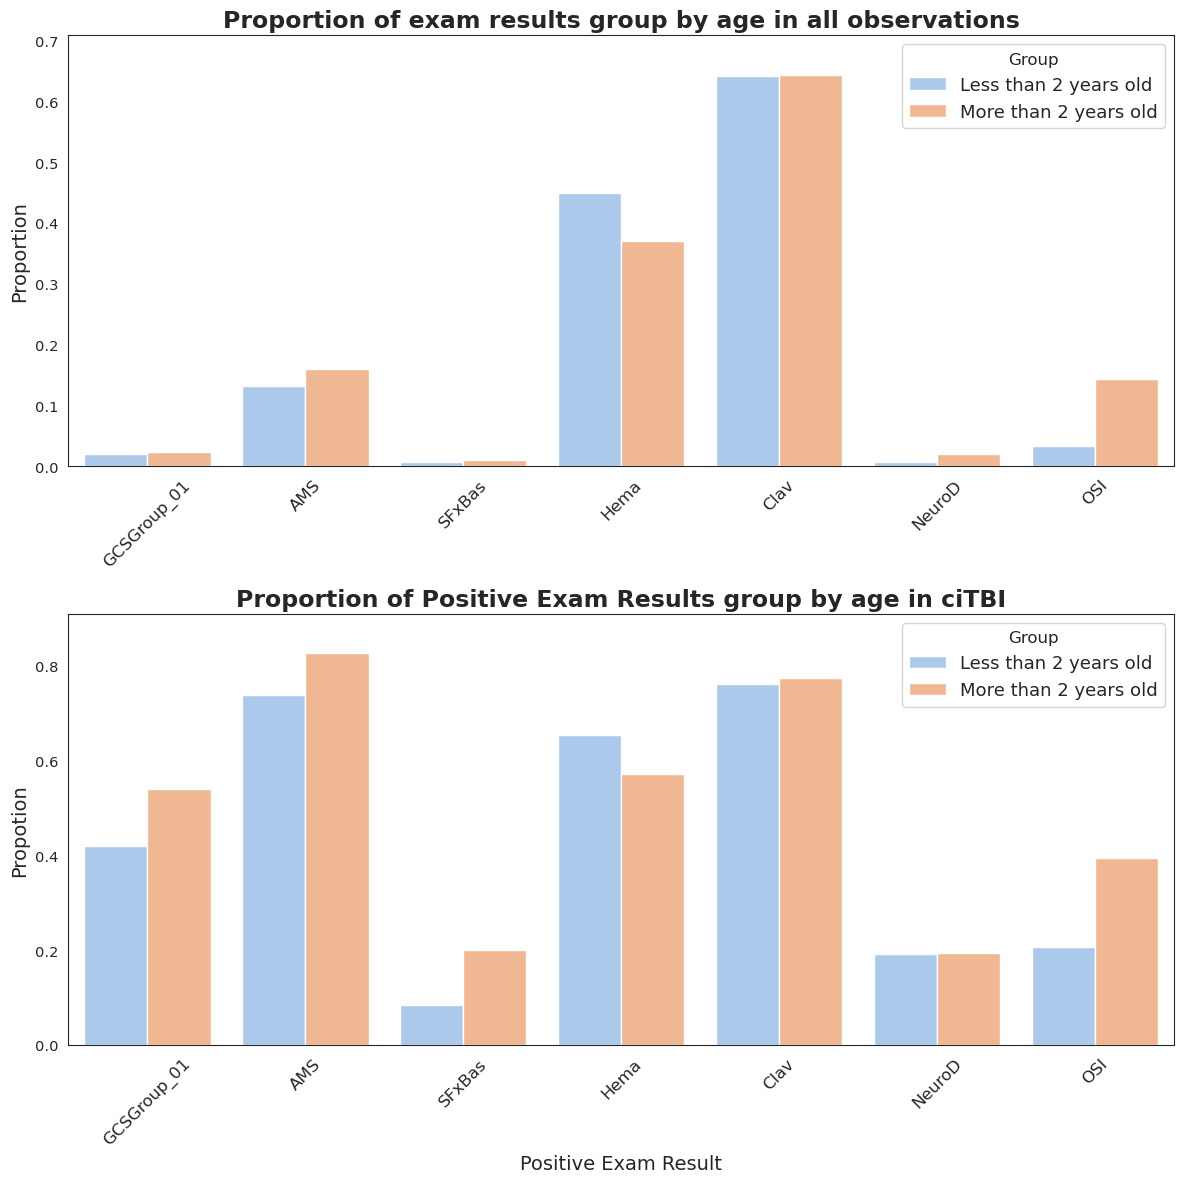

In [53]:



young_data = prepared_data[prepared_data['AgeinYears'] <= 2]
older_data = prepared_data[prepared_data['AgeinYears'] > 2]


columns = ['GCSGroup_01', 'AMS', 'SFxBas', 'Hema', 'Clav', 'NeuroD', 'OSI']
frequencies1 = {}
frequencies2 = {}
for col in columns:
    frequencies1[col] = young_data[col].value_counts(normalize=True).get(1, 0)
    frequencies2[col] = older_data[col].value_counts(normalize=True).get(1, 0)

frequencies1_df = pd.DataFrame.from_dict(frequencies1, orient='index', columns=['Frequency'])
frequencies2_df = pd.DataFrame.from_dict(frequencies2, orient='index', columns=['Frequency'])

frequencies1_df['Group'] = 'Less than 2 years old'
frequencies2_df['Group'] = 'More than 2 years old'
frequencies_df = pd.concat([frequencies1_df, frequencies2_df])
frequencies_df = frequencies_df.reset_index().rename(columns={'index': 'Exam Result'})



fig, axes = plt.subplots(2, 1, figsize=(12, 12))  

sns.set(style="whitegrid")
ax1 = sns.barplot(x='Exam Result', y='Frequency', hue='Group', data=frequencies_df, palette='pastel', ax=axes[0]) # 指定在 axes[0] 上绘制
ax1.set_xlabel('', fontsize=14)
ax1.set_ylabel('Proportion', fontsize=14)
ax1.set_title("Proportion of exam results group by age in all observations", fontsize=17, fontweight='bold')
ax1.tick_params(axis='x', rotation=45, labelsize=12)
ax1.set_ylim(0, frequencies_df['Frequency'].max() * 1.1)
ax1.legend(title='Group', fontsize=13)


young_data = prepared_data[(prepared_data['AgeinYears'] <= 2) & (prepared_data['PosIntFinal'] == 1)]
older_data = prepared_data[(prepared_data['AgeinYears'] > 2) & (prepared_data['PosIntFinal'] == 1)]


columns = ['GCSGroup_01', 'AMS', 'SFxBas', 'Hema', 'Clav', 'NeuroD', 'OSI']
frequencies1 = {}
frequencies2 = {}
for col in columns:
    frequencies1[col] = young_data[col].value_counts(normalize=True).get(1, 0)
    frequencies2[col] = older_data[col].value_counts(normalize=True).get(1, 0)

frequencies1_df = pd.DataFrame.from_dict(frequencies1, orient='index', columns=['Frequency'])
frequencies2_df = pd.DataFrame.from_dict(frequencies2, orient='index', columns=['Frequency'])

frequencies1_df['Group'] = 'Less than 2 years old'
frequencies2_df['Group'] = 'More than 2 years old'
frequencies_df = pd.concat([frequencies1_df, frequencies2_df])
frequencies_df = frequencies_df.reset_index().rename(columns={'index': 'Exam Result'})

ax2 = sns.barplot(x='Exam Result', y='Frequency', hue='Group', data=frequencies_df, palette='pastel', ax=axes[1]) 
ax2.set_xlabel('Positive Exam Result', fontsize=14)
ax2.set_ylabel('Propotion', fontsize=14)
ax2.set_title("Proportion of Positive Exam Results group by age in ciTBI", fontsize=17, fontweight='bold')
ax2.tick_params(axis='x', rotation=45, labelsize=12)
ax2.set_ylim(0, frequencies_df['Frequency'].max() * 1.1)
ax2.legend(title='Group', fontsize=13)



plt.tight_layout()  

plt.savefig("../figs/finding2.png", dpi=300, bbox_inches='tight')
plt.show()

## Finding 1

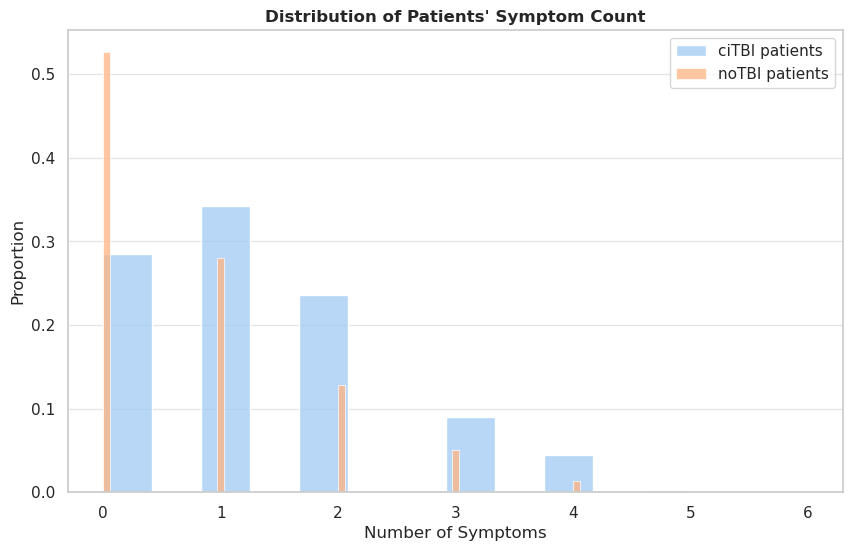

In [54]:
# symptoms combination
symptoms_columns = ['Amnesia_verb','Seiz', 'Vomit', 'HA_verb','Dizzy', 'ActNorm_inverse']
prepared_data['num_symptoms_comb'] = prepared_data[symptoms_columns].sum(axis=1)
citbi_data = prepared_data[prepared_data['PosIntFinal'] == 1]
notbi_data = prepared_data[(prepared_data['PosIntFinal'] != 1)&(prepared_data['PosCT'] != 1)]

plt.figure(figsize=(10, 6))  
sns.set(style="whitegrid") 

ax = plt.gca() 
ax.grid(axis='y', alpha=0.5) 
ax.xaxis.grid(False) 
sns.histplot(citbi_data['num_symptoms_comb'],  label="ciTBI patients", kde=False, stat="probability", color=sns.color_palette('pastel')[0])  # 绘制df1的直方图，颜色设置为lightgreen
sns.histplot(notbi_data['num_symptoms_comb'],  label="noTBI patients", kde=False, stat="probability", color=sns.color_palette('pastel')[1])    # 绘制df2的直方图，颜色设置为darkblue


plt.xlabel("Number of Symptoms")  
plt.ylabel("Proportion") 
plt.title("Distribution of Patients' Symptom Count",fontweight='bold')  
plt.legend()  
# plt.grid(True, linestyle='--', alpha=0.5)


plt.savefig("../figs/finding1.png", dpi=300, bbox_inches='tight')
plt.show()

## finding 3

In [55]:
# age injury
prepared_data['InjuryMech'].value_counts()


InjuryMech
8.0     11883
6.0      4733
1.0      3910
90.0     3465
12.0     3158
11.0     3016
10.0     2979
9.0      2908
7.0      2455
4.0      1701
2.0      1433
5.0       901
3.0       556
Name: count, dtype: int64

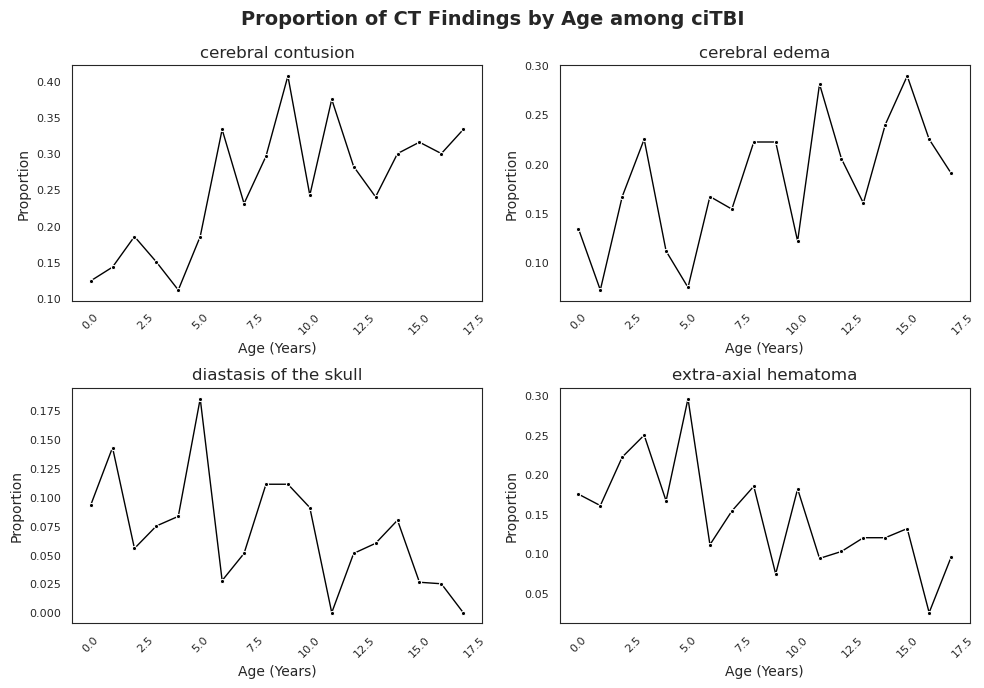

In [56]:

tbi_data = prepared_data[prepared_data['PosIntFinal'] == 1]


col_names = ['Finding2', 'Finding3', 'Finding5', 'Finding7']
sub_titiles = ['cerebral contusion','cerebral edema','diastasis of the skull', 'extra-axial hematoma']


sns.set(context='paper', style='white', font='sans-serif', font_scale=1.2)
# plt.rcParams['font.family'] = 'Arial'  
plt.rcParams['axes.linewidth'] = 0.8
#plt.rcParams['grid.linestyle'] = '--'  
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4

fig, axes = plt.subplots(2, 2, figsize=(10, 7)) 
axes = axes.flatten()


colors = sns.color_palette("tab10", len(col_names)) 

for i, col_name in enumerate(col_names):
    
    age_injury_proportion = tbi_data.groupby('AgeinYears')[col_name].apply(lambda x: (x == 1).sum() / len(x))

    sns.lineplot(x=age_injury_proportion.index, y=age_injury_proportion.values, marker='o', ax=axes[i], color='black', linewidth=1, markersize=3)
    axes[i].set_title(f'{sub_titiles[i]}', fontsize=12)
    axes[i].set_xlabel('Age (Years)', fontsize=10)
    axes[i].set_ylabel('Proportion', fontsize=10)
    # axes[i].grid(False, linewidth=0.5, linestyle='--') 
    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
    axes[i].spines['top'].set_visible(True)
    axes[i].spines['right'].set_visible(True)
    


plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('Proportion of CT Findings by Age among ciTBI', fontsize=14, fontweight='bold')
plt.savefig("../figs/finding3.png", dpi=300, bbox_inches='tight')
plt.show()

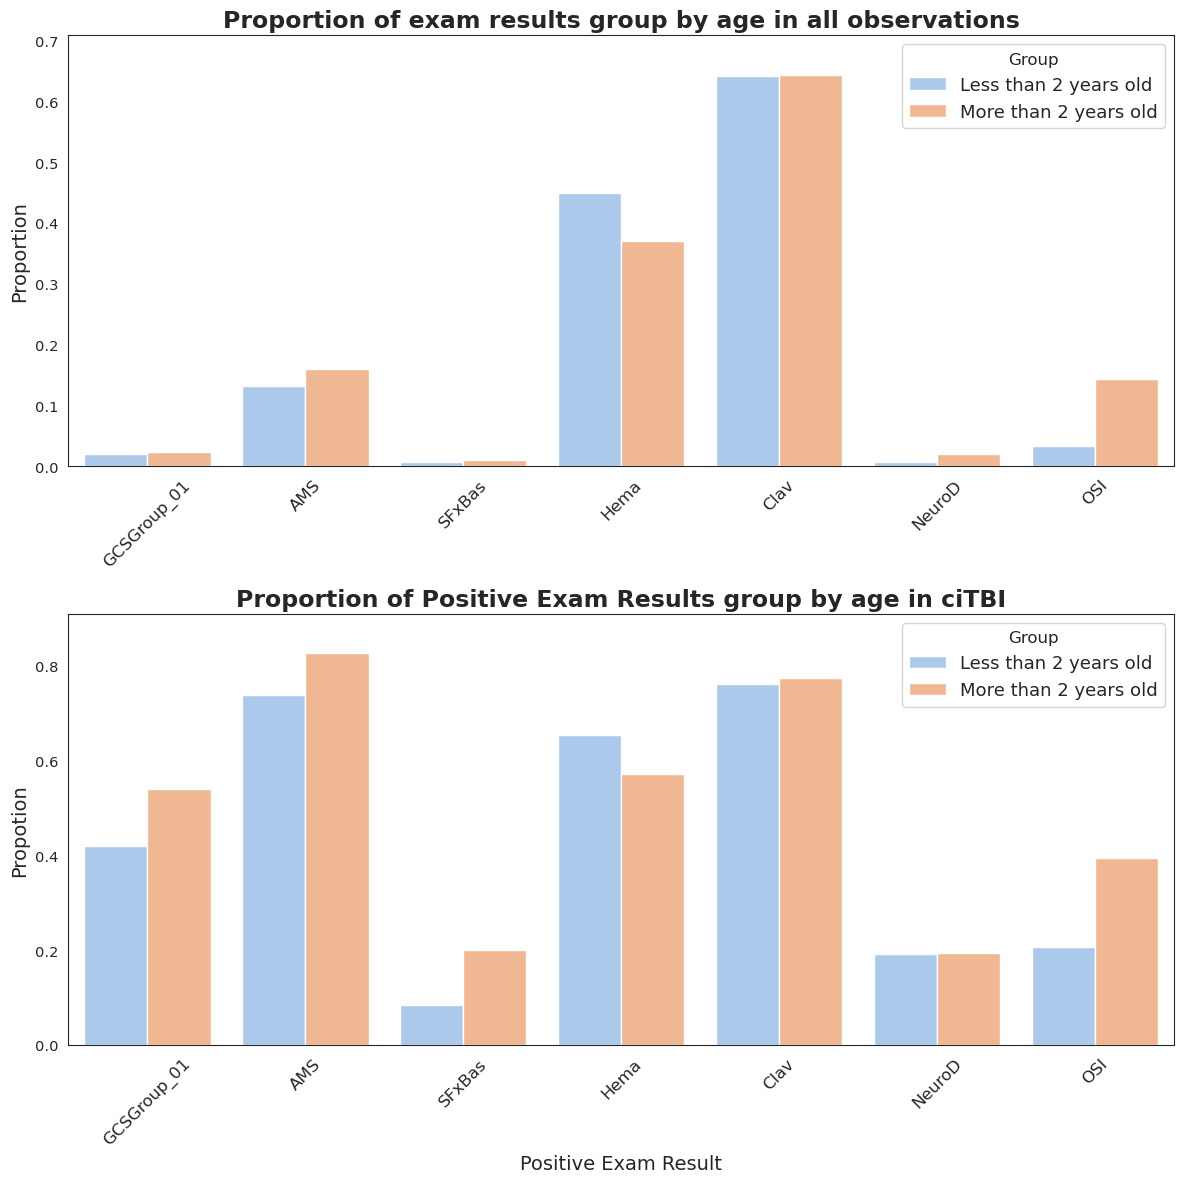

In [64]:
prepared_data_p = prepare_tbi_data(df_original, check_consistency=False)


# for all observation

young_data = prepared_data[prepared_data['AgeinYears'] <= 2]
older_data = prepared_data[prepared_data['AgeinYears'] > 2]


columns = ['GCSGroup_01', 'AMS', 'SFxBas', 'Hema', 'Clav', 'NeuroD', 'OSI']
frequencies1 = {}
frequencies2 = {}
for col in columns:
    frequencies1[col] = young_data[col].value_counts(normalize=True).get(1, 0)
    frequencies2[col] = older_data[col].value_counts(normalize=True).get(1, 0)

frequencies1_df = pd.DataFrame.from_dict(frequencies1, orient='index', columns=['Frequency'])
frequencies2_df = pd.DataFrame.from_dict(frequencies2, orient='index', columns=['Frequency'])


frequencies1_df['Group'] = 'Less than 2 years old'
frequencies2_df['Group'] = 'More than 2 years old'
frequencies_df = pd.concat([frequencies1_df, frequencies2_df])
frequencies_df = frequencies_df.reset_index().rename(columns={'index': 'Exam Result'})

fig, axes = plt.subplots(2, 1, figsize=(12, 12))  

sns.set(style="whitegrid")
ax1 = sns.barplot(x='Exam Result', y='Frequency', hue='Group', data=frequencies_df, palette='pastel', ax=axes[0]) # 指定在 axes[0] 上绘制
ax1.set_xlabel('', fontsize=14)
ax1.set_ylabel('Proportion', fontsize=14)
ax1.set_title("Proportion of exam results group by age in all observations", fontsize=17, fontweight='bold')
ax1.tick_params(axis='x', rotation=45, labelsize=12)
ax1.set_ylim(0, frequencies_df['Frequency'].max() * 1.1)
ax1.legend(title='Group', fontsize=13)


young_data = prepared_data[(prepared_data['AgeinYears'] <= 2) & (prepared_data['PosIntFinal'] == 1)]
older_data = prepared_data[(prepared_data['AgeinYears'] > 2) & (prepared_data['PosIntFinal'] == 1)]


columns = ['GCSGroup_01', 'AMS', 'SFxBas', 'Hema', 'Clav', 'NeuroD', 'OSI']
frequencies1 = {}
frequencies2 = {}
for col in columns:
    frequencies1[col] = young_data[col].value_counts(normalize=True).get(1, 0)
    frequencies2[col] = older_data[col].value_counts(normalize=True).get(1, 0)

frequencies1_df = pd.DataFrame.from_dict(frequencies1, orient='index', columns=['Frequency'])
frequencies2_df = pd.DataFrame.from_dict(frequencies2, orient='index', columns=['Frequency'])


frequencies1_df['Group'] = 'Less than 2 years old'
frequencies2_df['Group'] = 'More than 2 years old'
frequencies_df = pd.concat([frequencies1_df, frequencies2_df])
frequencies_df = frequencies_df.reset_index().rename(columns={'index': 'Exam Result'})

ax2 = sns.barplot(x='Exam Result', y='Frequency', hue='Group', data=frequencies_df, palette='pastel', ax=axes[1]) # 指定在 axes[1] 上绘制
ax2.set_xlabel('Positive Exam Result', fontsize=14)
ax2.set_ylabel('Propotion', fontsize=14)
ax2.set_title("Proportion of Positive Exam Results group by age in ciTBI", fontsize=17, fontweight='bold')
ax2.tick_params(axis='x', rotation=45, labelsize=12)
ax2.set_ylim(0, frequencies_df['Frequency'].max() * 1.1)
ax2.legend(title='Group', fontsize=13)



plt.tight_layout() 

plt.savefig("../figs/finding2-p.png", dpi=300, bbox_inches='tight')
plt.show()

# Models

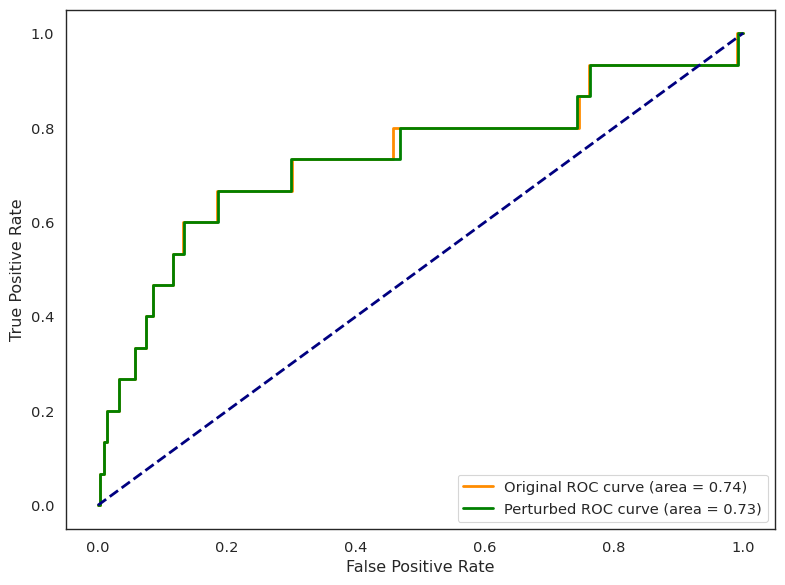

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.metrics import recall_score, roc_curve, auc

drop_col = ['PatNum', 'EmplType', 'Certification', 'CTDone', 'PosCT', 'Race', 'Ethnicity', 'HospHeadPosCT', 'Intub24Head', 'Neurosurgery',
            'HospHead', 'DeathTBI','EDCT','CTSed'] + [f"Finding{i}" for i in range(1, 15)] + [f"Finding{i}" for i in range(20, 24)] 
data1 = prepared_data.drop(drop_col, axis=1)
data1= data1.dropna()

X1 = data1.drop('PosIntFinal', axis=1)
y1 = data1['PosIntFinal']
X1_scaled = StandardScaler().fit_transform(X1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.2, random_state=42)

data2 = prepared_data_p.drop(drop_col, axis=1)
data2= data2.dropna()
X2 = data2.drop('PosIntFinal', axis=1)
y2 = data2['PosIntFinal']
X2_scaled = StandardScaler().fit_transform(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.2, random_state=42)


# --- Model Training (Data1) ---
model1 = LogisticRegression(random_state=42, penalty='l2', solver='liblinear', class_weight='balanced', C=0.1)
model1.fit(X1_train, y1_train)
y1_pred_proba = model1.predict_proba(X1_test)[:, 1]

# --- Model Training (Data2) ---
model2 = LogisticRegression(random_state=42, penalty='l2', solver='liblinear', class_weight='balanced', C=0.1)
model2.fit(X2_train, y2_train)
y2_pred_proba = model2.predict_proba(X2_test)[:, 1]

# --- ROC Curve Calculation ---
fpr1, tpr1, _ = roc_curve(y1_test, y1_pred_proba)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y2_test, y2_pred_proba)
roc_auc2 = auc(fpr2, tpr2)


# --- Plotting with Seaborn ---
plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
sns.set(context='paper', style='white', font='sans-serif', font_scale=1.2)

plt.plot(fpr1, tpr1, color='darkorange', lw=2, label=f'Original ROC curve (area = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'Perturbed ROC curve (area = {roc_auc2:.2f})')  # Different color for Data2
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")

plt.tight_layout()  

plt.savefig("../figs/model-p.png", dpi=300, bbox_inches='tight')
plt.show()

In [58]:
y.value_counts()

PosIntFinal
0.0    15965
1.0       51
Name: count, dtype: int64

The dataset is imbalance so accuracy is so close to 1

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Added classification_report
import pandas as pd
import numpy as np


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model with class weights
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # or 'balanced_subsample'
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)  # Get precision, recall, F1-score

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")

# Feature Importances (as before)
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df)

Accuracy: 0.9953183520599251
Confusion Matrix:
[[3189    0]
 [  15    0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3189
         1.0       0.00      0.00      0.00        15

    accuracy                           1.00      3204
   macro avg       0.50      0.50      0.50      3204
weighted avg       0.99      1.00      0.99      3204

               Feature    Importance
0           InjuryMech  1.196876e-02
1   High_impact_InjSev  1.027579e-02
2         Amnesia_verb  4.203736e-03
3          LOCSeparate  4.550423e-03
4               LocLen  7.615700e-03
..                 ...           ...
90            Observed  6.000518e-03
91       EDDisposition  2.770734e-01
92     ActNorm_inverse  1.424608e-02
93         GCSGroup_01  8.908384e-15
94   num_symptoms_comb  2.513172e-02

[95 rows x 2 columns]


/scratch/users/jingjia_wang/conda/envs/py311_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/scratch/users/jingjia_wang/conda/envs/py311_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/scratch/users/jingjia_wang/conda/envs/py311_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_